===== AdaBoost =====
Accuracy: 0.9708


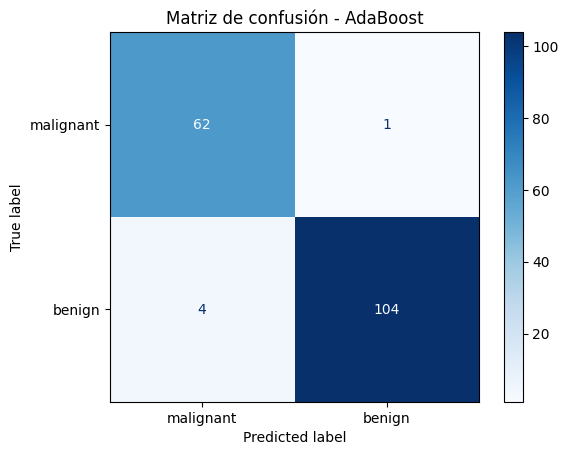

===== GradientBoosting =====
Accuracy: 0.9591


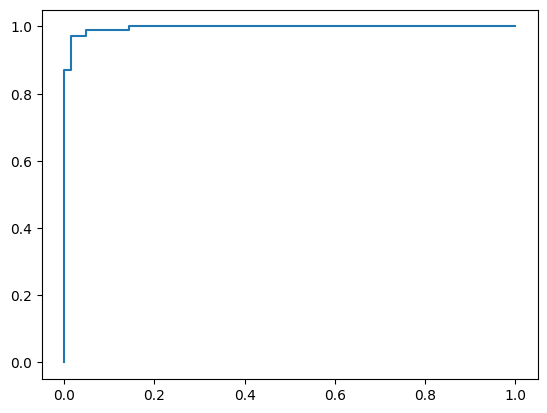

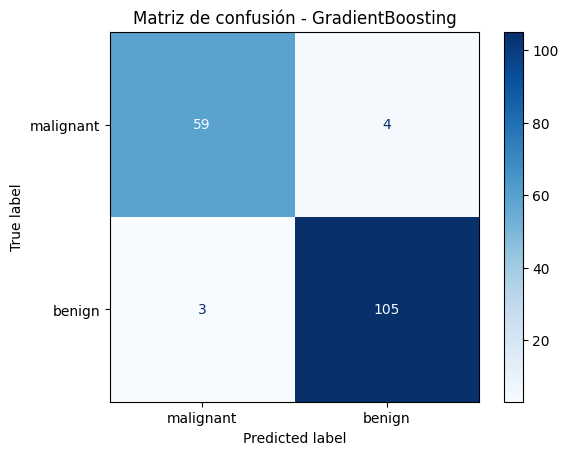

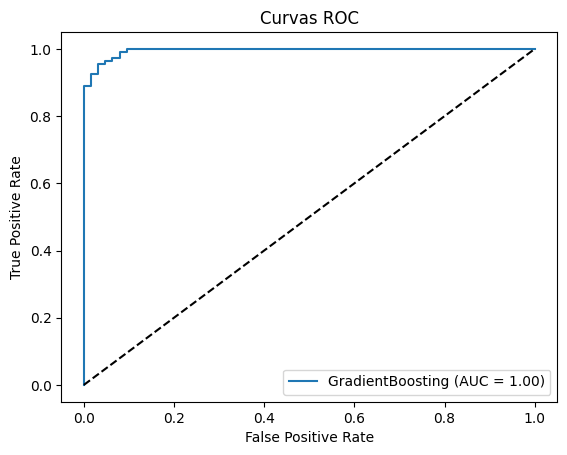

Resultados de Accuracy:
AdaBoost: 0.9708
GradientBoosting: 0.9591


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# ==========================
# Cargar dataset
# ==========================
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ==========================
# Definir clasificadores
# ==========================
classifiers = {
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# ==========================
# Entrenar y evaluar
# ==========================
results = {}

for name, clf in classifiers.items():
    print(f"===== {name} =====")
    
    # Entrenar
    clf.fit(X_train, y_train)
    
    # Predicciones
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:, 1]
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Accuracy: {acc:.4f}")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de confusión - {name}")
    plt.show()
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC")
plt.legend(loc="lower right")
plt.show()

# ==========================
# Resultados finales
# ==========================
print("Resultados de Accuracy:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")
